In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

In [28]:
#load data
dataset = pd.read_csv('C:\\Users\\Owner\\Downloads\\hiring.csv')

# Pre-processing
print(dataset.head())
dataset['experience'].fillna(0, inplace=True)

dataset['test_score'].fillna(dataset['test_score'].mean(), inplace=True)

X = dataset.iloc[:, :3]

  experience  test_score  interview_score  salary
0       four           8                9   50000
1       four           8                6   45000
2       five           6                7   60000
3        two          10               10   65000
4      seven           9                6   70000


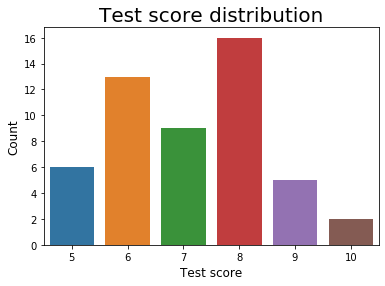

In [29]:
#plotting test score column
b = sns.countplot(dataset['test_score'])
b.axes.set_title('Test score distribution', fontsize = 20)
b.set_xlabel('Test score', fontsize = 12)
b.set_ylabel('Count', fontsize = 12)
plt.show()

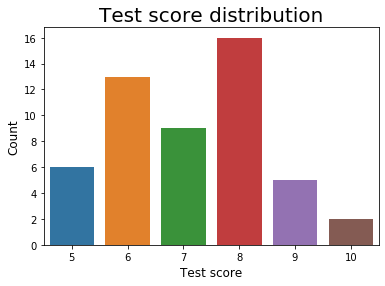

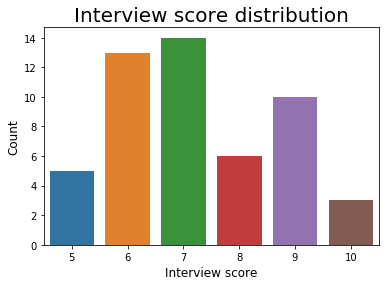

In [30]:
#plotting interview score column
b = sns.countplot(dataset['test_score'])
b.axes.set_title('Test score distribution', fontsize = 20)
b.set_xlabel('Test score', fontsize = 12)
b.set_ylabel('Count', fontsize = 12)
plt.show()
b = sns.countplot(dataset['interview_score'])
b.axes.set_title('Interview score distribution', fontsize = 20)
b.set_xlabel('Interview score', fontsize = 12)
b.set_ylabel('Count', fontsize = 12)
plt.show()

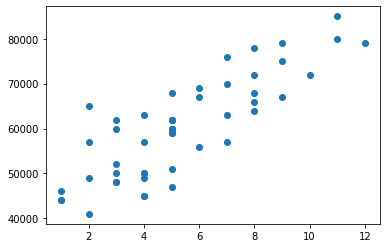

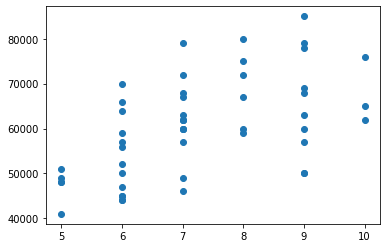

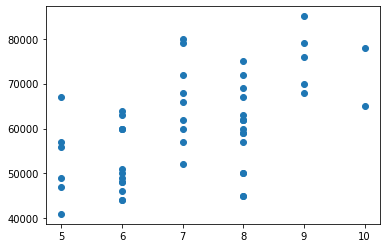

In [31]:
#Converting words to integer values
def convert_to_int(word):
    word_dict = {'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8,
                'nine':9, 'ten':10, 'eleven':11, 'twelve':12, 'zero':0, 0: 0}
    return word_dict[word]

X['experience'] = X['experience'].apply(lambda x : convert_to_int(x))

y = dataset.iloc[:, -1]

plt.scatter(X['experience'],y)
plt.show()

plt.scatter(X['interview_score'],y)
plt.show()

plt.scatter(X['test_score'],y)
plt.show()

In [32]:
#Splitting Training and Test Set
#Since we have a very small dataset, we will train our model with all availabe data.

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#Fitting model with trainig data
regressor.fit(X, y)

# Saving model to disk
pickle.dump(regressor, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[2, 9, 6]]))

[50017.44238971]
